# Accediendo sensores

Los dispositivos modernos contienen arreglos de sensores embebidos. Una de las funcionalidades de acceder programaticamente al dispositivo usando Python es que podemos interactuar directamente con los sensores. En esta libreta vamos a aprender como determinar que sensores se tienen en el dispositivo y como tomar lecturas de ellos. Posterioremente usaremos estas lecturas para algunas aplicaciones.

Comenzaremos con determinar que sensores se tienen en el dispositivo. Para esto usaremos las funciones disponibles en la fachada de sensores [SensorManagerFacade](https://github.com/kuri65536/sl4a/blob/master/docs/ApiReference.md#startsensingtimed).

In [2]:
!adb devices && adb forward tcp:9999 tcp:2222

List of devices attached
R88DEAEY55Y59THU	device



In [3]:
import android
droid = android.Android()
droid.ttsSpeak("Listo para recibir instrucciones")

Result(id=0, result=None, error=None)

Para acceder a los sensores es necesario iniciar la lectura de los sensores con la funcion `startSensingTimed` que espera dos argumentos de entrada; el primero de ellos se refiere a cual sensor se quiere tomar lectura (1=Todos, 2=Acelerometro, 3=Magnetometro y 4=Iluminacion; estos cuatro son los sensores mas comunes que hay en la mayoria de los dispositivos). El segundo argumento de la funcion es el tiempo maximo entre lecturas en milisegundos.

Esta funcion comienza a tomar lectura de los sensores y poniendolos a disposicion para que puedan ser obtenidos usando funciones individuales.

Vamos a comenzar iniciando las lecturas de todos los sensores (primer argumento de la funcion 1) cada 250 milisegundos:

**NOTA: colocar el dispositivo en un estado de monitoreo y lectura de los sensores puede disminuir considerablemente la bateria.**

In [4]:
droid.startSensingTimed(1, 250)

Result(id=1, result=None, error=None)

Ahora podemos conocer los valores mas recientes obtenidos por los sensores. El diccionario depende de los sensores disponibles en su modelo de dispositivo.

In [5]:
droid.readSensors().result

{u'accuracy': 2,
 u'light': 65,
 u'proximity-0': 1,
 u'proximity-1': 0,
 u'proximity-2': 0,
 u'xforce': -0.038,
 u'yforce': -0.325,
 u'zforce': 9.73}

Es conveniente detener la colecta de datos de los sensores si no se esta accediendo a ellos

In [6]:
droid.stopSensing()

Result(id=3, result=None, error=None)

In [9]:
import time

droid.startSensingTimed(1, 250)
time.sleep(1)
s1 = droid.readSensors().result
s2 = droid.sensorsGetAccuracy().result
s3 = droid.sensorsGetLight().result
s4 = droid.sensorsReadAccelerometer().result
s5 = droid.sensorsReadMagnetometer().result
s6 = droid.sensorsReadOrientation().result
droid.stopSensing()

Result(id=20, result=None, error=None)

In [11]:
print s1
print s2
print s3
print s4
print s5
print s6

{u'light': 65, u'zforce': 9.739, u'yforce': -0.392, u'proximity-2': 0, u'proximity-1': 0, u'proximity-0': 1, u'accuracy': 2, u'xforce': -0.114}
2
65
[-0.028, -0.344, 9.912]
[None, None, None]
[None, None, None]


Ahora vamos a hacer un programa que lea los datos del sensor de aceleracion, y los grafique. Este programa no puede reproducirse en el dispositivo por la libreria que usaremos para graficar los valores de aceleracion.

In [12]:
# definimos una lista para guardar las lecturas e inicializamos tiempos 
aceleracion = []
tiempoCensado = 0.
tiempoTotal = 3000 # 3 segundos de datos

In [13]:
# comenzaremos a el censado con opcion 2=Acelerometro en intervalos de 100 milisegundos
droid.startSensingTimed(2,100)
while tiempoCensado <= tiempoTotal:
    aceleracion.append(droid.sensorsReadAccelerometer().result) # lectura de valores
    tiempoCensado += 100 # incrementa tiempoCensado 
droid.stopSensing()

Result(id=53, result=None, error=None)

La siguiente celda importa `pandas` una libreria especializada para manipular datos; la segunda linea permite desplegar graficas en las libretas

In [14]:
import pandas as pd
%matplotlib inline

Creamos una estructura en `pandas` llamada `DataFrame` para contener los datos. Esta estructura tiene muchas funciones utiles que permiten trabajar de forma eficiente con (grandes) datos. Una de ellas es `plot()`.

In [15]:
acel=pd.DataFrame(aceleracion, columns=["x","y","z"])

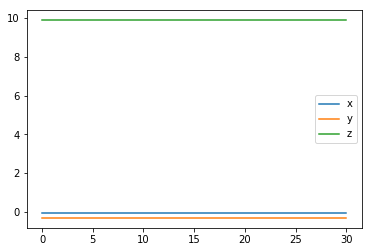

In [16]:
acel.plot()

# Ejercicio
vuelvan a capturar datos de aceleracion pero muevan el dispositivo mientras lo hacen y grafiquen. Que observan?

In [24]:
aceleracion = []
tiempoCensado = 0.
tiempoTotal = 3000 # 3 segundos de datos

In [25]:
droid.startSensingTimed(2,100)
while tiempoCensado <= tiempoTotal:
    time.sleep(100/1000.00)
    aceleracion.append(droid.sensorsReadAccelerometer().result) # lectura de valores
    tiempoCensado += 100 # incrementa tiempoCensado 
droid.stopSensing()

Result(id=119, result=None, error=None)

In [26]:
acel=pd.DataFrame(aceleracion, columns=["x","y","z"])

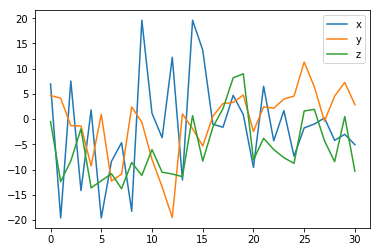

In [27]:
acel.plot()